<a href="https://colab.research.google.com/github/mchhour31/NN_work/blob/main/k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

## Importing the libraries

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Importing the dataset

In [18]:
df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [19]:
X = df.iloc[:, [3, 4]].values

## Using the elbow method to find the optimal number of clusters

For n_clusters=2, The Silhouette Coefficient is 0.2968969162503008
For n_clusters=3, The Silhouette Coefficient is 0.46761358158775435
For n_clusters=4, The Silhouette Coefficient is 0.4931963109249047
For n_clusters=5, The Silhouette Coefficient is 0.553931997444648
For n_clusters=6, The Silhouette Coefficient is 0.53976103063432
For n_clusters=7, The Silhouette Coefficient is 0.5288104473798049
For n_clusters=8, The Silhouette Coefficient is 0.4585133619741466
For n_clusters=9, The Silhouette Coefficient is 0.45819645551960536
For n_clusters=10, The Silhouette Coefficient is 0.4516611669212085


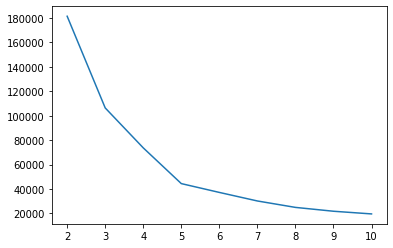

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

distortions = []
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k).fit(X)
  labels = kmeans.labels_
  sil_coeff = silhouette_score(X, labels, metric='euclidean')
  print("For n_clusters={}, The Silhouette Coefficient is {}".format(k, sil_coeff))

  distortions.append(kmeans.inertia_)
  
plt.plot(range(2, 11), distortions)

## Training the K-Means model on the dataset

In [36]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_predict = kmeans.fit_predict(X)
y_predict

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

## Visualising the clusters

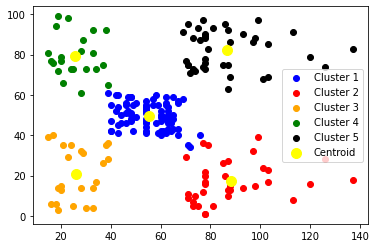

In [44]:
plt.scatter(X[y_predict == 0, 0], X[y_predict == 0, 1], c='blue', label='Cluster 1')
plt.scatter(X[y_predict == 1, 0], X[y_predict == 1, 1], c='red', label='Cluster 2')
plt.scatter(X[y_predict == 2, 0], X[y_predict == 2, 1], c='orange', label='Cluster 3')
plt.scatter(X[y_predict == 3, 0], X[y_predict == 3, 1], c='green', label='Cluster 4')
plt.scatter(X[y_predict == 4, 0], X[y_predict == 4, 1], c='black', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroid')

plt.legend()
plt.show()